In [1]:
#IMPORTS

import matplotlib
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import scipy
import scipy.interpolate
import mne
import scipy
import statistics
from pywt import wavedec
from scipy import signal
import matplotlib.colors as mcolors
import random
import seaborn as sns


In [2]:
#DEF

'''FOR THE INITIAL DATA TREATMENT'''
#DEF UPPER CHANNEL
def upperchanel(chanlesnames):
    upperchanels=[]
    for i in chanlesnames:
        r = i.upper()
        upperchanels.append(r)
    return upperchanels

#DEF GRUP INFO DE CADA COMPONENT
def group_inf(nomgroup, data_chan, upperchanels):
    group_date = []

    for e in nomgroup:
        if e in upperchanels:
            num = upperchanels.index(e)
            #print(num)
            group_date.append(data_chan[num])  
    #print(group_date)
    return group_date

#DEF MEDIUM DELS GRUPS
#group_dat = [[1,2,3,..., 119345],[1,2,3,..., 119345],[1,2,3,..., 119345],[1,2,3,..., 119345]]
def mediumchanels(group_dat):
    segundo = len(group_dat[0])
    primero = len(group_dat)
    mean_data = []
    for i in range (0,segundo):
        suma1=[]
        for e in range(0,primero):
            suma1.append(group_dat[e][i])
        numpero = statistics.median(suma1)
        mean_data.append(numpero)
    return mean_data


def opteciogrups(chanlesnames, groupp, data_chan):
    group_date_finale = [] #Save all informatio chanels 12.
    group_date_final = [] #final copy
    upchan = upperchanel(chanlesnames)
    for i in groupp:
        group_date = group_inf(i, data_chan, upchan)
        mean_group = mediumchanels(group_date)
        mean_array = np.array(mean_group)
        group_date_finale.append(mean_array)
    group_date_final = np.array(group_date_finale)
    return group_date_final



'''FOR THE EPOCH'''
#TO FIND THE NEAREST POSITION OF THE DATA THAT CORESPOND TO THE ONE INTRODUCED.
def find_nearest(array,value): 
       idx = (np.abs(array-value)).argmin()
       return int(idx)

#EXTRACT THE t FROM THE DATA
def grabt(dat):
    Fs = 250.0
    Ts = 1.0/Fs
    t = np.arange(len(dat)) / Fs
    return t
    


In [3]:
#general info
#GROUPS
group1= ["FP2", "AFZ", "FZ", "FCZ", "CZ"]
group2= ["F7", "F5", "F3", "F1", "AF7", "AF3", "FP1"]
group3= ["FP2", "AF4", "AF8", "F2", "F4", "F6", "F8"]
group4= ["FT7", "T7", "TP7"]
group5= ["FC5", "FC3", "FC1", "C5", "C3", "C1"]
group6= ["CP5", "CP3", "CP1", "P7", "P5", "P3", "P1"]
group7= ["PO7", "PO3", "O1", "PO9"]
group8= ["PO4", "PO8", "O2", "PO10"]
group9= ["P2", "P4", "P6", "P8", "CP2", "CP4", "CP6"]
group10= ["FT8", "T8", "TP8"]
group11= ["CPZ", "PZ", "POZ", "OZ", "IZ"]
group12= ["FC2", "FC4", "FC6", "C2", "C4", "C6"]

#X
groups = [group1, group2, group3, group4, group5, group6, group7, group8, group9, group10, group11, group12]

In [4]:
#LOAD
x2=mne.io.read_raw_eeglab('Files/Preprocessed/sub-010003_EC.set', preload=True, verbose=True)
#GET DATA
datax2 = x2._data
#GET CHANELS
chanles_names2 = x2.ch_names
#REDUCE CHANELS TO 12
groups_date_finalle2 = opteciogrups(chanles_names2, groups, datax2)
#TRANSFORM TO MNE
titlegrup = ["ch1","ch2","ch3","ch4","ch5","ch6","ch7","ch8","ch9","ch10","ch11","ch12"]
ct_ty = ["eeg", "eeg", "eeg", "eeg", "eeg", "eeg", "eeg", "eeg", "eeg", "eeg", "eeg", "eeg"]
sfreq = 250
info = mne.create_info(ch_names=titlegrup, sfreq=sfreq, ch_types=ct_ty)
raw2 = mne.io.RawArray(groups_date_finalle2, info)

Reading Files/Preprocessed/sub-010003_EC.fdt
Reading 0 ... 119515  =      0.000 ...   478.060 secs...
Creating RawArray with float64 data, n_channels=12, n_times=119516
    Range : 0 ... 119515 =      0.000 ...   478.060 secs
Ready.


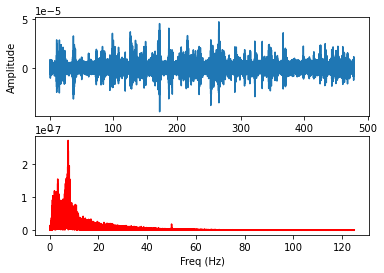

In [5]:
#ALL

import math
data = groups_date_finalle2[0]

Fs = 250.0
Ts = 1.0/Fs
t = np.arange(len(data)) / Fs

n = len(data) # length of the signal
k = np.arange(n)
T = n/Fs
frq = k/T # two sides frequency range
frq = frq[range(int(n/2))]

Y = np.fft.fft(data)/n
Y = Y[range(int(n/2))]


fig, ax = plt.subplots(2, 1)
ax[0].plot(t,data)
ax[0].set_xlabel('Time')
ax[0].set_ylabel('Amplitude')
ax[1].plot(frq,abs(Y),'r')
ax[1].set_xlabel('Freq (Hz)')

plt.draw()
plt.show()

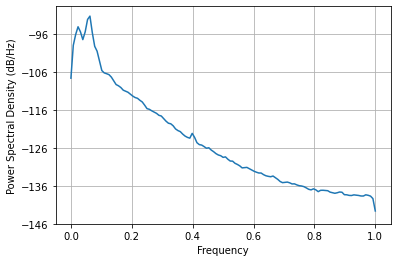

In [6]:
matplotlib.pyplot.psd(data)
plt.show()
#Frq ! radius no, should be hz.

Info.; Epoch: 1; Len of the data: 1250; Channel: 1


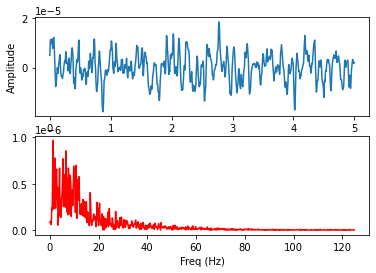

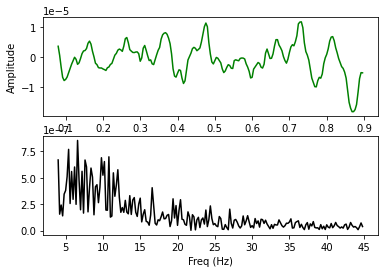

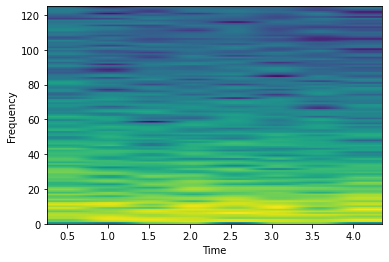

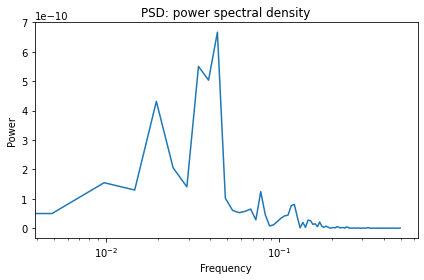

NameError: name 'spectra' is not defined

In [12]:
# epoch fuction (5s split with overlap)(n epochs x)
#
sf=250

#PARA MOSTRAR x PLOTS:
printsome = 0 #CREATE VARIABLE COUNTER
nummaxiterations = 4 #NUMBER OF PLOTS WE WANT

#INICIATE VARIABLES THAT WILL MOVE FOR EACH EPOC TIME.
tinici = 0
tfinal = 1250

#
r=0

#EPOCH COUNTER
numepo= 1

#WHAT CHANEL WE WORK UP ON 12
chanel = 1

#VARIABLES DONDE SE GUARDARAN LA INFORMACION DE LOS EPOCHS
save_epoc_data = []
save_epoc_temps = []

#INITIATE THE LOOP (TOTAL TIME DIVIDED IN PERIODS OF 5 SECONDS)
for i in range(0,int(int(T)/5)):

    #FROM THE CHANEL SELECTED EXTRACT THE t DATA
    t = grabt(groups_date_finalle2[chanel])

    #SELECT FROM t AND group_date THE DATA FROM POSITIONS tinici to tfinal
    epoc_temps = t[tinici:tfinal]
    epoc_data = groups_date_finalle2[chanel,tinici:tfinal]

    save_epoc_data.append(epoc_data)
    save_epoc_temps.append(epoc_temps)    

    #PRINT THE INFORMATION OF THIS EPOCH
    print("Info.; Epoch: "+str(numepo)+"; Len of the data: "+str(len(epoc_data))+"; Channel: "+str(chanel))
    numepo=numepo+1

    if printsome<=int(nummaxiterations):

        x = epoc_data

        #See time plt.
        Fs = 250.0 
        Ts = 1.0/Fs
        tn = np.arange(len(x)) / Fs
        

        #See frq plot.
        n = len(x)            # Length of the signal
        k = np.arange(n)
        Tn = n/Fs
        frq = k/Tn            # Two sides frequency range
        frq = frq[range(int(n/2))] #<-
        Y = np.fft.fft(x)/n
        Y = Y[range(int(n/2))]
        Yp = abs(Y)
        #print(abs(Y))
        fig, ax = plt.subplots(2, 1)
        ax[0].plot(tn,x)
        ax[0].set_xlabel('Time')
        ax[0].set_ylabel('Amplitude')
        
        ax[1].plot(frq,abs(Y),'r')
        ax[1].set_xlabel('Freq (Hz)')
        plt.plot()
        plt.show()

        #Select Beta frequencie
        #https://numpy.org/doc/stable/reference/generated/numpy.trapz.html 

        #SELECT THE POSITION OF THE FREQ ZONES
        ti = find_nearest(frq, 4)
        tf = find_nearest(frq, 45)

        #SELECT THE data, frequency and time OF THE POSITION GIVEN
        powerv = epoc_data[ti:tf]
        mm = frq[ti:tf]
        dt = epoc_temps[ti:tf]
        Yselect = Yp[ti:tf]

        #PLOTS
        fig, ax = plt.subplots(2, 1)
        ax[0].plot(dt,powerv,'g')
        ax[0].set_xlabel('Time')
        ax[0].set_ylabel('Amplitude')

        ax[1].plot(mm,Yselect,'k')
        ax[1].set_xlabel('Freq (Hz)')
        ax[0].set_ylabel('Amplitude')
        plt.plot()
        plt.show()
        
    

        
        # Plot the spectrogram
        samplingFrequency   = 250
        powerSpectrum, freqenciesFound, time, imageAxis = plt.specgram(x, Fs=samplingFrequency)
        plt.xlabel('Time')
        plt.ylabel('Frequency')
        plt.show()   


        # Compute and plot the power spectral density (PSD)
        freqs, psd = signal.welch(powerv)
        plt.semilogx(freqs, psd)
        plt.title('PSD: power spectral density')
        plt.xlabel('Frequency')
        plt.ylabel('Power')
        plt.tight_layout()
        plt.show()


        #tr = np.trapz( ,powerv) #big band

        #ff

        #find the "small" band
        '''tf = find_nearest(frq, 4)
        ti = find_nearest(frq, 45)
        powerv = x[ti:tf]
        tr = numpy.trapz( x,powerv)'''

        #google: https://www.google.com/search?client=safari&rls=en&q=find+the+%22big%22+band+find+the+%22small%22+band+Divided+each+one+with+the+big+band+eeg&ie=UTF-8&oe=UTF-8

        #google: https://www.google.com/search?client=safari&rls=en&sxsrf=ALeKk03QdsEe4eYyE3wWlOdsr5PK18_8Pg:1606061250586&q=np.trapz+%22eeg%22+python&sa=X&ved=2ahUKEwjj_8-yxJbtAhXqSxUIHc0wAV8Q5t4CMAB6BAgEEAw&biw=1440&bih=837

        #trp: https://numpy.org/doc/stable/reference/generated/numpy.trapz.html

        #walav: https://pywavelets.readthedocs.io/en/latest/ref/dwt-discrete-wavelet-transform.html 
        


        #Divided each one with the big band

        #http://centaur.reading.ac.uk/76159/9/biosensors-08-00030%20%281%29.pdf 
        Gamma = np.trapz (np.abs(Y[(frq >= 32) & (frq <= 100)])) #the other bands
        Beta = np.trapz(np.abs (Y[(frq >= 13) & (frq <= 32)]))
        apha = np.trapz(np.abs (Y[(frq >= 9) & (frq <= 13)]))
        theta = np.trapz(np.abs (Y[(frq >= 4) & (frq <= 8)]))
        delta = np.trapz(np.abs (Y[(frq >= 0.1) & (frq <= 4)]))
        #relative band power
        gamma_b = Gamma / Beta
        apha_b = apha / Beta
        theta_b = theta / Beta
        delta_b = delta / Beta


        t1 = find_nearest(frq, 0.5)
        t2 = find_nearest(frq, 4)
        t3 = find_nearest(frq, 8)
        t4 = find_nearest(frq, 13)
        t5 = find_nearest(frq, 40)
        t6 = find_nearest(frq, 80)

        #gamma
        f_gama = frq[t1:t2]
        Y_gama = Yp[t1:t2]
        #beta
        f_beta = frq[t2:t3]
        Y_beta = Yp[t2:t3]
        #alpha
        f_alpha = frq[t3:t4]
        Y_alpha = Yp[t3:t4]
        #theta
        f_theta = frq[t4:t5]
        Y_theta = Yp[t4:t5]
        #delta
        f_delta = frq[t5:t6]
        Y_delta = Yp[t5:t6]

        
        deltaPower = 10^(np.mean(spectra(Y_gama))/10)
        thetaPower = 10^(np.mean(spectra(Y_beta))/10)
        alphaPower = 10^(np.mean(spectra(Y_alpha))/10)
        betaPower = 10^(np.mean(spectra(Y_theta))/10)
        gammaPower = 10^(np.mean(spectra(Y_delta))/10)
        totalPower=deltaPower+thetaPower+alphaPower+betaPower
        relativeDelta=deltaPower/totalPower
        relativeAlpha=alphaPower/totalPower
        relativeBeta=betaPower/totalPower
        relativeTheta=thetaPower/totalPower

        '''pywt.dwt(x, wavelet)'''

        
        #cD5 - b.Power - power spectral density - (after - cut it in frec. and find the average, see it under the spectrum).
        
        printsome=printsome+1


    tfinal=tfinal+1250
    tinici= tinici+1250


In [9]:
Gamma

6.677514137775799e-06

In [54]:
titlegrup = ["ch1","ch2","ch3","ch4","ch5","ch6","ch7","ch8","ch9","ch10","ch11","ch12"]
ct_ty = ["eeg", "eeg", "eeg", "eeg", "eeg", "eeg", "eeg", "eeg", "eeg", "eeg", "eeg", "eeg"]
#save_epoc_data - ch1
numer=1
r=[]
chtype=[]
for i in range(0,95):
    r.append('ch1-'+str(numer))
    chtype.append('eeg')
    numer=numer+1
print(r)

['ch1-1', 'ch1-2', 'ch1-3', 'ch1-4', 'ch1-5', 'ch1-6', 'ch1-7', 'ch1-8', 'ch1-9', 'ch1-10', 'ch1-11', 'ch1-12', 'ch1-13', 'ch1-14', 'ch1-15', 'ch1-16', 'ch1-17', 'ch1-18', 'ch1-19', 'ch1-20', 'ch1-21', 'ch1-22', 'ch1-23', 'ch1-24', 'ch1-25', 'ch1-26', 'ch1-27', 'ch1-28', 'ch1-29', 'ch1-30', 'ch1-31', 'ch1-32', 'ch1-33', 'ch1-34', 'ch1-35', 'ch1-36', 'ch1-37', 'ch1-38', 'ch1-39', 'ch1-40', 'ch1-41', 'ch1-42', 'ch1-43', 'ch1-44', 'ch1-45', 'ch1-46', 'ch1-47', 'ch1-48', 'ch1-49', 'ch1-50', 'ch1-51', 'ch1-52', 'ch1-53', 'ch1-54', 'ch1-55', 'ch1-56', 'ch1-57', 'ch1-58', 'ch1-59', 'ch1-60', 'ch1-61', 'ch1-62', 'ch1-63', 'ch1-64', 'ch1-65', 'ch1-66', 'ch1-67', 'ch1-68', 'ch1-69', 'ch1-70', 'ch1-71', 'ch1-72', 'ch1-73', 'ch1-74', 'ch1-75', 'ch1-76', 'ch1-77', 'ch1-78', 'ch1-79', 'ch1-80', 'ch1-81', 'ch1-82', 'ch1-83', 'ch1-84', 'ch1-85', 'ch1-86', 'ch1-87', 'ch1-88', 'ch1-89', 'ch1-90', 'ch1-91', 'ch1-92', 'ch1-93', 'ch1-94', 'ch1-95']


In [55]:
info = mne.create_info(ch_names=r, sfreq=sfreq, ch_types=chtype)
epoch_raw = mne.io.RawArray(save_epoc_data, info)

Creating RawArray with float64 data, n_channels=95, n_times=1250
    Range : 0 ... 1249 =      0.000 ...     4.996 secs
Ready.


Effective window size : 4.904 (s)


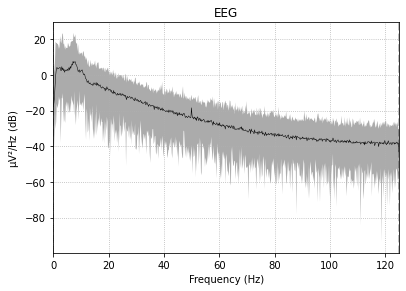

In [60]:
save_info_epo = epoch_raw.plot_psd(area_mode='range', tmax=4.9, show=False, average=True)
#psd


In [23]:
arrayt = mne.time_frequency.psd_array_welch(x, sfreq, fmin=0, fmax=125, n_fft=256, n_overlap=100, n_per_seg=None, n_jobs=1, average='mean', verbose=None)


Effective window size : 1.024 (s)


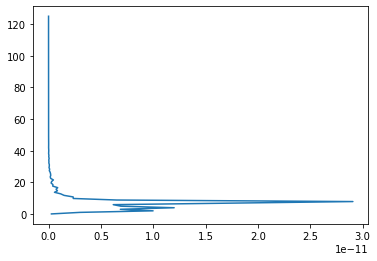

In [24]:

plt.plot(arrayt[0],arrayt[1])
plt.show()

In [7]:
#https://pywavelets.readthedocs.io/en/latest/ref/dwt-discrete-wavelet-transform.html

In [8]:
#standar erros mean
#filter 30hz? paper check
# - preproz bandpass filtered within 1-45 Hz (8th order, Butterworth filter)
# - (vi) band-pass filtering between 0.01-0.1 Hz (FSL),

# Gamma

# http://www.sci.utah.edu/publications/anderson10/Anderson_python_processing2010.pdf
#-



# cut it to diferent frec. bands theta (4-8Hz), alpha(8-13Hz), beta(13-30Hz), gamma(30-45Hz).
#-

#aver. ex/4-8 for power values -> 1 feature x epoch x sub. x brain region (chanels 12).
#all up / all bands  (to se the band power %)

In [28]:
#General aspects
titlegrup = ["ch1","ch2","ch3","ch4","ch5","ch6","ch7","ch8","ch9","ch10","ch11","ch12"]
ct_ty = ["eeg", "eeg", "eeg", "eeg", "eeg", "eeg", "eeg", "eeg", "eeg", "eeg", "eeg", "eeg"]
sfreq = 250
info = mne.create_info(ch_names=titlegrup, sfreq=sfreq, ch_types=ct_ty)


In [32]:
#LOAD EC
xEC=mne.io.read_raw_eeglab('Files/Preprocessed/sub-010003_EC.set', preload=True, verbose=True)
#GET DATA
dataEC = xEC._data
#GET CHANELS
chanles_namesEC = xEC.ch_names
#REDUCE CHANELS TO 12
groups_date_finalleEC = opteciogrups(chanles_namesEC, groups, dataEC)
#TRANSFORM TO MNE
rawEC = mne.io.RawArray(groups_date_finalleEC, info)

Reading Files/Preprocessed/sub-010003_EC.fdt
Reading 0 ... 119515  =      0.000 ...   478.060 secs...
Creating RawArray with float64 data, n_channels=12, n_times=119516
    Range : 0 ... 119515 =      0.000 ...   478.060 secs
Ready.


In [33]:
#LOAD EO
xEO=mne.io.read_raw_eeglab('Files/Preprocessed/sub-010003_EO.set', preload=True, verbose=True)
#GET DATA
dataEO = xEO._data
#GET CHANELS
chanles_namesEO = xEO.ch_names
#REDUCE CHANELS TO 12
groups_date_finalleEO = opteciogrups(chanles_namesEO, groups, dataEO)
#TRANSFORM TO MNE
rawEO = mne.io.RawArray(groups_date_finalleEO, info)

Reading Files/Preprocessed/sub-010003_EO.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...
Creating RawArray with float64 data, n_channels=12, n_times=120000
    Range : 0 ... 119999 =      0.000 ...   479.996 secs
Ready.


-------------------------------------


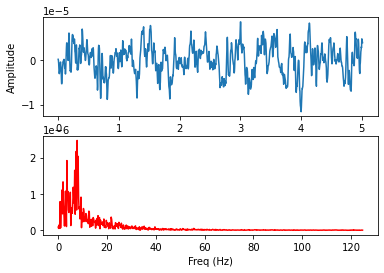

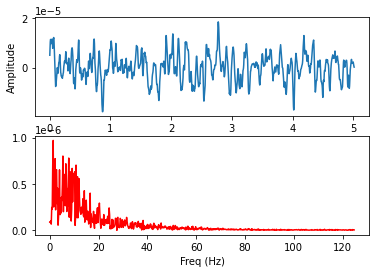

-------------------------------------


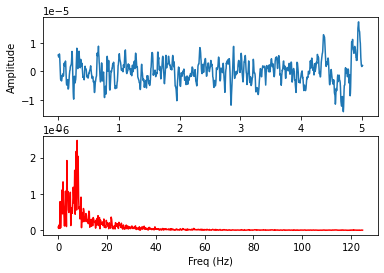

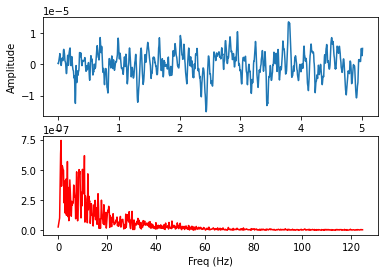

-------------------------------------


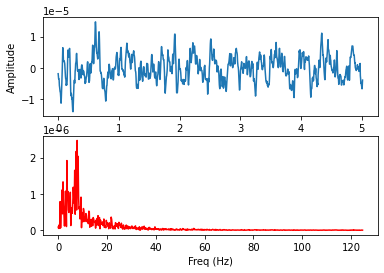

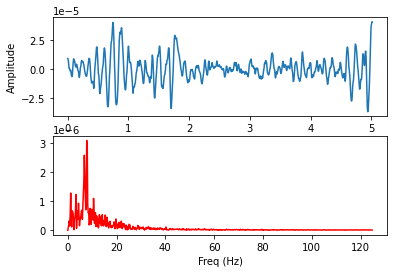

-------------------------------------


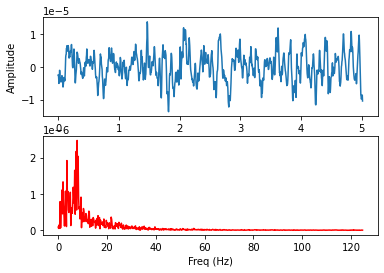

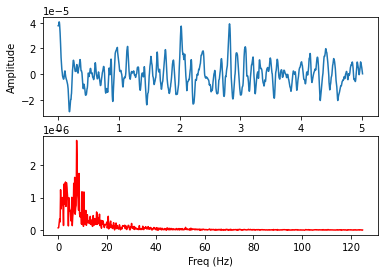

-------------------------------------


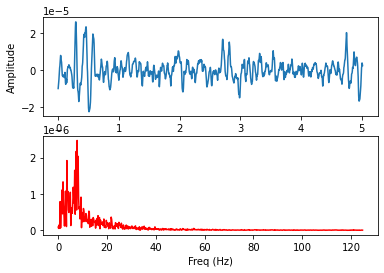

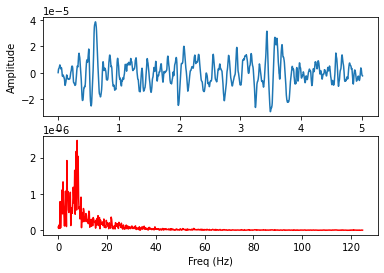

In [36]:
# epoch fuction (5s split with overlap)(n epochs x)

#
sf=250
#PARA MOSTRAR x PLOTS:
printsome = 0 #CREATE VARIABLE COUNTER
nummaxiterations = 4 #NUMBER OF PLOTS WE WANT
#INICIATE VARIABLES THAT WILL MOVE FOR EACH EPOC TIME.
tinici = 0
tfinal = 1257

r=0
#EPOCH COUNTER
numepo= 1

#WHAT CHANEL WE WORK UP ON 12
chanel = 1

#VARIABLES DONDE SE GUARDARAN LA INFORMACION DE LOS EPOCHS
save_epoc_data = []
save_epoc_temps = []



#INITIATE THE LOOP (TOTAL TIME DIVIDED IN PERIODS OF 5 SECONDS)
for i in range(0,int(int(T)/5)):

    #FROM THE CHANEL SELECTED EXTRACT THE t DATA
    tEC = grabt(groups_date_finalleEC[chanel])
    tEO = grabt(groups_date_finalleEO[chanel])

    #SELECT FROM t AND group_date THE DATA FROM POSITIONS tinici to tfinal
    epoc_tempsEC = tEC[tinici:tfinal-2]
    epoc_dataEC = groups_date_finalleEC[chanel,tinici:tfinal-2]

    epoc_tempsEO = tEO[tinici:tfinal-2]
    epoc_dataEO = groups_date_finalleEO[chanel,tinici:tfinal-2]
 
    if printsome<=int(nummaxiterations):

        print('-------------------------------------')
        coeffs = wavedec(epoc_dataEO, 'db4', level=6)

        #See data frq and time plt.
        Fs = 250.0 
        Ts = 1.0/Fs
        tn = np.arange(len(epoc_dataEO)) / Fs
        
        n = len(epoc_dataEO)                    #Length of the signal
        k = np.arange(n)
        Tn = n/Fs
        frq = k/Tn # two sides frequency range
        frq = frq[range(int(n/2))]
        Y = np.fft.fft(x)/n
        Y = Y[range(int(n/2))]
        fig, ax = plt.subplots(2, 1)
        ax[0].plot(tn,epoc_dataEO)
        ax[0].set_xlabel('Time')
        ax[0].set_ylabel('Amplitude')
        ax[1].plot(frq,abs(Y),'r')
        ax[1].set_xlabel('Freq (Hz)')
        plt.plot()
        plt.show()


        
        n = len(epoc_dataEC)                    #Length of the signal
        k = np.arange(n)
        Tn = n/Fs
        frq = k/Tn # two sides frequency range
        frq = frq[range(int(n/2))]
        Y = np.fft.fft(epoc_dataEC)/n
        Y = Y[range(int(n/2))]
        fig, ax = plt.subplots(2, 1)
        ax[0].plot(tn,epoc_dataEC)
        ax[0].set_xlabel('Time')
        ax[0].set_ylabel('Amplitude')
        ax[1].plot(frq,abs(Y),'r')
        ax[1].set_xlabel('Freq (Hz)')
        plt.plot()
        plt.show()

        

        
        printsome=printsome+1


    tfinal=tfinal+1257
    tinici= tinici+1257